# 1. Text and Image Processing
Machine Learning can understand text and images. From detecting spam emails to recognizing handwritten digits or even coloring old black-and-white photos, these projects show how ML works with everyday data.

# 1. Detecting Spam Emails
# 2. SMS Spam Detection
# 3. Classification of Text Documents using Naive Bayes
# 4. OCR of Handwritten digits | OpenCV
# 5. Recognizing HandWritten Digits in Scikit Learn
# 6. Cartooning an Image using OpenCV - Python



# 1. Detecting Spam Emails Using Tensorflow in Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\VIVOBBOK
[nltk_data]     16\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('Emails.csv')
data.head()

,id,label,text,label_num
0,1,ham,Subject: example ham email 1\nThis is a normal...,0
1,2,ham,Subject: example ham email 2\nThis is a normal...,0
2,3,ham,Subject: example ham email 3\nThis is a normal...,0
3,4,ham,Subject: example ham email 4\nThis is a normal...,0
4,5,ham,Subject: example ham email 5\nThis is a normal...,0


In [5]:
data.shape

(1000, 4)

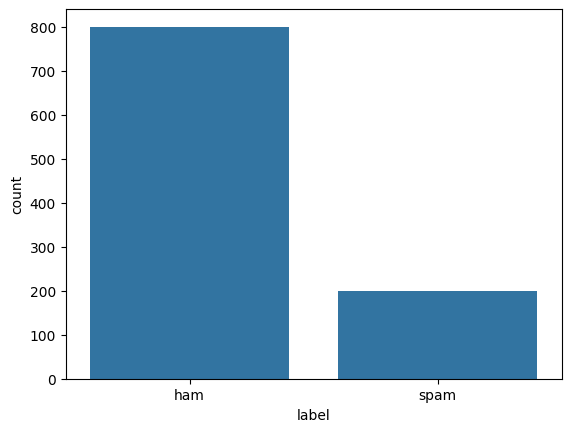

In [6]:
sns.countplot(x='label', data=data)
plt.show()

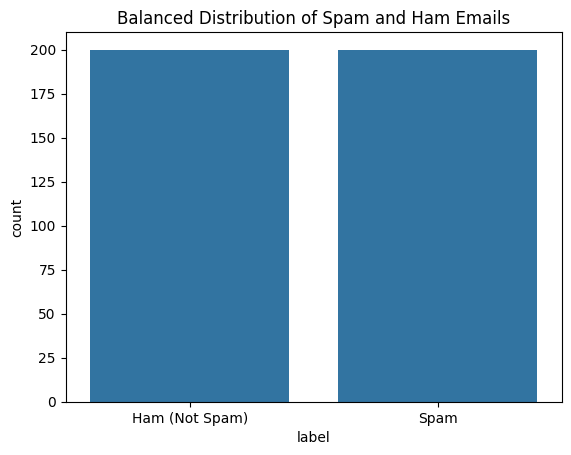

In [7]:
ham_msg = data[data['label'] == 'ham']
spam_msg = data[data['label'] == 'spam']

# Downsample Ham emails to match the number of Spam emails
ham_msg_balanced = ham_msg.sample(n=len(spam_msg), random_state=42)

# Combine balanced data
balanced_data = pd.concat([ham_msg_balanced, spam_msg]).reset_index(drop=True)

# Visualize the balanced dataset
sns.countplot(x='label', data=balanced_data)
plt.title("Balanced Distribution of Spam and Ham Emails")
plt.xticks(ticks=[0, 1], labels=['Ham (Not Spam)', 'Spam'])
plt.show()

In [8]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.head()

,id,label,text,label_num
0,697,ham,: example ham email 697\nThis is a normal emai...,0
1,668,ham,: example ham email 668\nThis is a normal emai...,0
2,64,ham,: example ham email 64\nThis is a normal email...,0
3,534,ham,: example ham email 534\nThis is a normal emai...,0
4,67,ham,: example ham email 67\nThis is a normal email...,0


In [9]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,id,label,text,label_num
0,697,ham,example ham email 697\nThis is a normal email...,0
1,668,ham,example ham email 668\nThis is a normal email...,0
2,64,ham,example ham email 64\nThis is a normal email ...,0
3,534,ham,example ham email 534\nThis is a normal email...,0
4,67,ham,example ham email 67\nThis is a normal email ...,0


In [10]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,id,label,text,label_num
0,697,ham,example ham email 697 normal email content 697,0
1,668,ham,example ham email 668 normal email content 668,0
2,64,ham,example ham email 64 normal email content 64,0
3,534,ham,example ham email 534 normal email content 534,0
4,67,ham,example ham email 67 normal email content 67,0


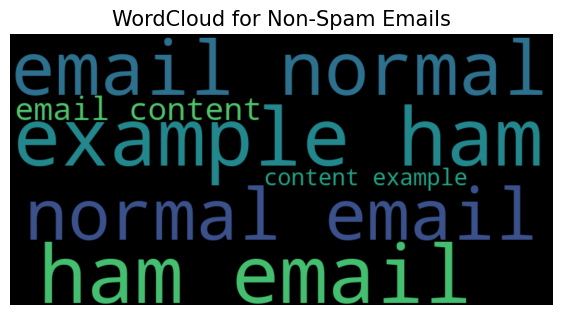

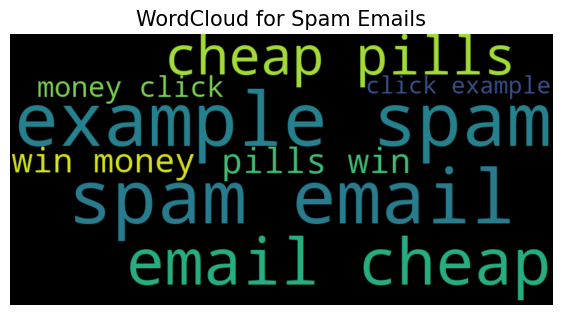

In [11]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
    wc = WordCloud(background_color='black', max_words=100, width=800, height=400).generate(email_corpus)
    plt.figure(figsize=(7, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} Emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label'] == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label'] == 'spam'], typ='Spam')

In [12]:
train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100  # Maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

train_Y = (train_Y == 'spam').astype(int)
test_Y = (test_Y == 'spam').astype(int)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 Train the Model

In [14]:
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)

history = model.fit(
    train_sequences, train_Y,
    validation_data=(test_sequences, test_Y),
    epochs=20,
    batch_size=32,
    callbacks=[lr, es]
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.4938 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5125 - loss: 0.6930 - val_accuracy: 0.4500 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5125 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5125 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6950 - learning_rate: 5.0000e-04


In [15]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4500 - loss: 0.6934
Test Loss : 0.6934496760368347
Test Accuracy : 0.44999998807907104


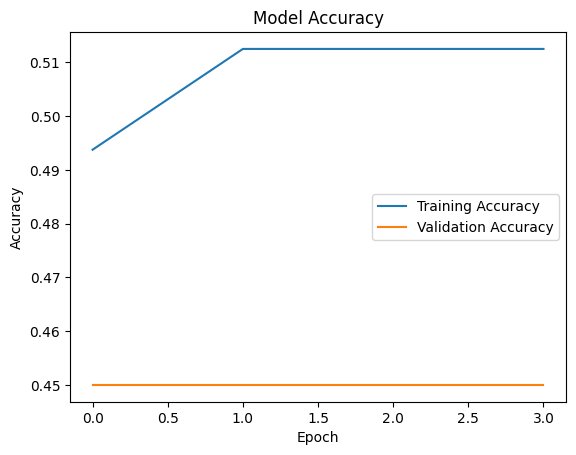

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 2. SMS Spam Detection using TensorFlow in Python

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
# Reading the data
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


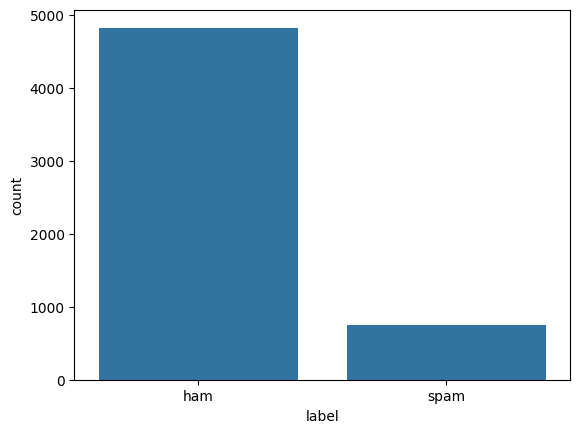

In [20]:
sns.countplot(x=df['label'])
plt.show()

In [21]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)

16


In [22]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

15686


In [23]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [25]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len

text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)

In [26]:
embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

In [39]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)

model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score 

def compile_model(model): 
	''' 
	simply compile the model with adam optimzer 
	'''
	model.compile(optimizer=keras.optimizers.Adam(), 
				loss=keras.losses.BinaryCrossentropy(), 
				metrics=['accuracy'])

def evaluate_model(model, X, y): 
	''' 
	evaluate the model and returns accuracy, 
	precision, recall and f1-score 
	'''
	y_preds = np.round(model.predict(X)) 
	accuracy = accuracy_score(y, y_preds) 
	precision = precision_score(y, y_preds) 
	recall = recall_score(y, y_preds) 
	f1 = f1_score(y, y_preds) 

	model_results_dict = {'accuracy': accuracy, 
						'precision': precision, 
						'recall': recall, 
						'f1-score': f1} 

	return model_results_dict 

def fit_model(model, epochs, X_train=X_train, y_train=y_train,
            X_test=X_test, y_test=y_test):
  '''
  fit the model with given epochs, train
  and test data
  '''
  # Check if validation data is provided
  if X_test is not None and y_test is not None:
      history = model.fit(X_train,
                      y_train,
                      epochs=epochs,
                      validation_data=(X_test, y_test)) #Removed validation steps argument
  else:
      # Handle case where validation data is not provided
      history = model.fit(X_train, 
                      y_train,
                      epochs=epochs)
  return history



# 3. Classification of Text Documents using Naive Bayes

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
data = pd.read_csv('synthetic_text_data.csv')
X = data['text']
y = data['label']
data

,text,label
0,Artificial intelligence is advancing in health...,Technology
1,Football fans are excited about the upcoming W...,Sports
2,New policies regarding climate change have spa...,Politics
3,The latest blockbuster movie has shattered box...,Entertainment
4,Quantum computing promises to revolutionize in...,Technology
...,...,...
80,AI is enhancing customer experiences in retail...,Technology
81,Politicians are debating the pros and cons of ...,Politics
82,Television networks are trying to adapt to the...,Entertainment
83,New wearable technologies are improving health...,Technology


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [45]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [46]:
y_pred = model.predict(X_test_vectorized)

Accuracy: 88.23529411764706%


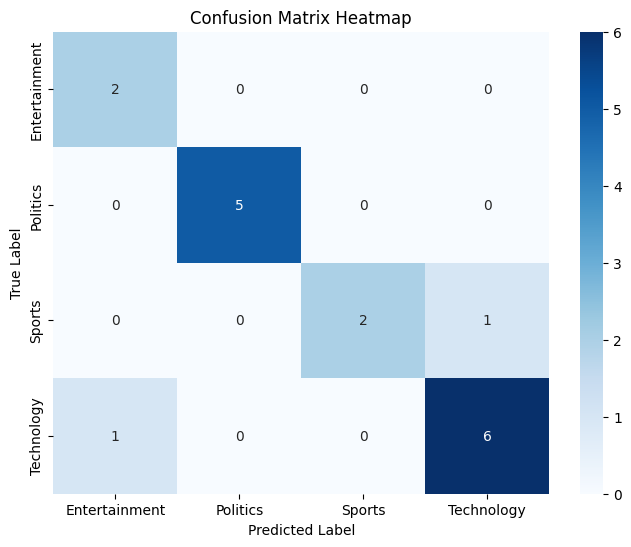

In [47]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy *100}%')

class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
user_input = ("I love artificial intelligence and machine learning")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Technology' category.


# 4. OCR of Handwritten digits | OpenCV

In [71]:
import numpy as np
import cv2

# --- Image Loading and Initial Data Preparation ---

# Read the image from the specified path.
# Make sure 'digits1.png' is in the same directory.
image = cv2.imread('digits1.png')

# Check if the image was loaded successfully.
if image is None:
    print("Error: The image file 'digits1.png' could not be loaded.")
    print("Please make sure the file exists and the path is correct.")
else:
    print("Image loaded successfully. Starting digit recognition process.")
    
    # Convert the image to grayscale.
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the height and width of the grayscale image.
    img_height, img_width = gray_img.shape
    
    print(f"Image dimensions: {img_width}x{img_height} pixels.")
    
    # Define the size of each digit cell.
    cell_size = 20

    # Calculate the number of rows and columns based on the image dimensions.
    num_rows = img_height // cell_size
    num_cols = img_width // cell_size
    
    # Check if the image dimensions are perfectly divisible by the cell size.
    if img_height % cell_size != 0 or img_width % cell_size != 0:
        print("Error: Image dimensions are not perfectly divisible by the cell size (20).")
        print("Please use an image with dimensions that are a multiple of 20.")
    else:
        # We are dividing the large image into a grid of 20x20 pixel images.
        divisions = np.vsplit(gray_img, num_rows)
        divisions_list = [np.hsplit(row, num_cols) for row in divisions]

        # Convert the list of divisions into a NumPy array.
        NP_array = np.array(divisions_list)
        
        # --- Data Preparation for Training and Testing ---
        # NOTE: You will need to adjust the rest of the code based on the new dimensions.
        # For example, if you have 10 digits (0-9) and you have num_cols of images,
        # you might need to adjust the split for train_data and test_data.
        # The original code assumed 100 columns of images.
        
        # Example adjustment for the rest of your code:
        num_samples = NP_array.shape[0] * NP_array.shape[1]
        
        # Reshape the data for the kNN classifier.
        data = NP_array.reshape(num_samples, cell_size * cell_size).astype(np.float32)

        # Assuming the first half of the samples are for training and the second for testing
        train_data = data[:num_samples//2]
        test_data = data[num_samples//2:]

        # Create labels (this part depends on the layout of your image)
        # Assuming each row contains a different digit (e.g., first row is 0s, second is 1s, etc.)
        num_train_samples_per_digit = train_data.shape[0] / 10
        num_test_samples_per_digit = test_data.shape[0] / 10

        if num_train_samples_per_digit.is_integer() and num_test_samples_per_digit.is_integer():
            k = np.arange(10)
            train_labels = np.repeat(k, int(num_train_samples_per_digit))[:, np.newaxis]
            test_labels = np.repeat(k, int(num_test_samples_per_digit))[:, np.newaxis]

            # --- K-Nearest Neighbors (kNN) Classifier ---
            knn = cv2.ml.KNearest_create()
            knn.train(train_data, cv2.ml.ROW_SAMPLE, train_labels)
            ret, output ,neighbours, distance = knn.findNearest(test_data, k = 3)
            
            matched = output==test_labels
            correct_OP = np.count_nonzero(matched)
            accuracy = (correct_OP*100.0)/(output.size)
            
            print(f"\nTotal test samples: {output.size}")
            print(f"Correctly classified samples: {correct_OP}")
            print(f"Accuracy: {accuracy:.2f}%")
        else:
            print("Error: The number of samples per digit is not an integer. The code's assumption about image layout might be wrong.")

Image loaded successfully. Starting digit recognition process.
Image dimensions: 512x512 pixels.
Error: Image dimensions are not perfectly divisible by the cell size (20).
Please use an image with dimensions that are a multiple of 20.


# 5. Recognizing HandWritten Digits in Scikit Learn

In [72]:
# importing the hand written digit dataset
from sklearn import datasets

# digit contain the dataset
digits = datasets.load_digits()

# dir function use to display the attributes of the dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [73]:
# outputting the picture value as a series of numbers
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [74]:
# importing the matplotlib libraries pyplot function
import matplotlib.pyplot as plt
# defining the function plot_multi

def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(15, 15))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    # printing the each digits in the dataset.
    plt.show()

    plot_multi(0)

In [75]:
# converting the 2 dimensional array to one dimensional array
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

# gives the  shape of the data
x.shape

(1797, 64)

In [76]:
# printing the one-dimensional array's values
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [77]:
# Very first 1000 photographs and
# labels will be used in training.
x_train = x[:1000]
y_train = y[:1000]

# The leftover dataset will be utilised to
# test the network's performance later on.
x_test = x[1000:]
y_test = y[1000:]

In [78]:
# importing the MLP classifier from sklearn
from sklearn.neural_network import MLPClassifier

# calling the MLP classifier with specific parameters
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True)

In [79]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

,hidden_layer_sizes,"(15,)"
,activation,'logistic'
,solver,'sgd'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,1


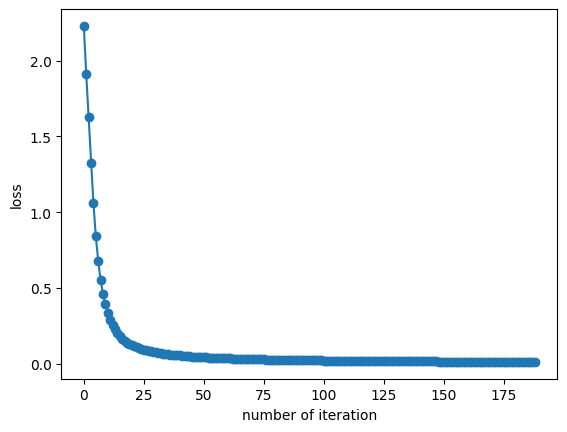

In [80]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

In [81]:
predictions = mlp.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [82]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [88]:
# importing the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score

# calculating the accuracy with y_test and predictions
accuracy_score(y_test, predictions)*100

91.46800501882058

# 6. Cartooning an Image using OpenCV - Python
Cartooning an image turns a normal photo into a fun, animated-style picture. With OpenCV, we do this by smoothing the image to simplify colors and detecting edges to create outlines.

In [1]:
import cv2
img = cv2.imread("css.png")
if img is None:
    print("Image not found")
    exit()

# Prep grayscale & blur
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g = cv2.medianBlur(g, 5)

# Edges
e = cv2.adaptiveThreshold(g, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                          cv2.THRESH_BINARY, 9, 9)

# Smooth color
c = cv2.bilateralFilter(img, 9, 250, 250)

# Combine
cartoon = cv2.bitwise_and(c, c, mask=e)

cv2.imshow("Cartoon", cartoon)
cv2.imwrite("cartoon_output.jpg", cartoon)
cv2.waitKey(0)
cv2.destroyAllWindows()